<a href="https://colab.research.google.com/github/farhananwari07/TugbesTKC_145-157/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import datasets & libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

169017344/169001437 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
# Import Libraries for CNN
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

In [ ]:
# Plot function for visualisation training process
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [ ]:
# Batch norm model 4
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=150,
          validation_data=(X_validation, y_validation))
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/150
100/100 [==============================] - 30s 303ms/step - loss: 3.1217 - acc: 0.2395 - val_loss: 3.5596 - val_acc: 0.2031
Epoch 2/150
100/100 [==============================] - 30s 302ms/step - loss: 3.0787 - acc: 0.2436 - val_loss: 2.9864 - val_acc: 0.2714
Epoch 3/150
100/100 [==============================] - 30s 303ms/step - loss: 2.9833 - acc: 0.2552 - val_loss: 2.9171 - val_acc: 0.2803
Epoch 4/150
100/100 [==============================] - 30s 303ms/step - loss: 2.8847 - acc: 0.2855 - val_loss: 3.0630 - val_acc: 0.2518
Epoch 5/150
100/100 [==============================] - 30s 302ms/step - loss: 2.8381 - acc: 0.2920 - val_loss: 2.8260 - val_acc: 0.2927
Epoch 6/150
100/100 [==============================] - 30s 302ms/step - loss: 2.8065 - acc: 0.2950 - val_loss: 2.7185 - val_acc: 0.3166
Epoch 7/150
100/100 [==============================] - 30s 302ms/step - loss: 2.7088 - acc: 0.3145 - val_loss: 2.6173 - val_acc: 0.3293
Epoch 8/150
100/100 [===========================

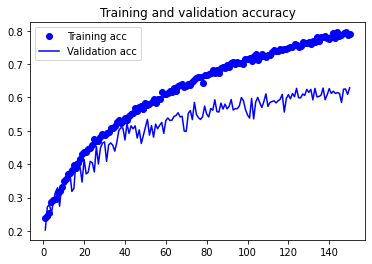

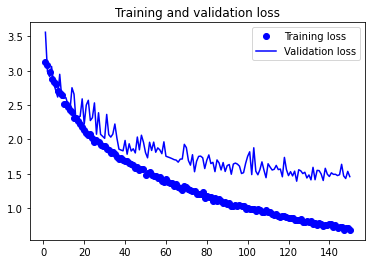

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Name of all classes in CIFAR-100
classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 
'aquarium' ,'fish', 'ray', 'shark', 'trout', 
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 
'bottles', 'bowls', 'cans', 'cups', 'plates', 
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 
'bear', 'leopard', 'lion', 'tiger', 'wolf', 
'bridge', 'castle', 'house', 'road', 'skyscraper', 
'cloud', 'forest', 'mountain', 'plain', 'sea', 
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 
'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 
'crab', 'lobster', 'snail', 'spider', 'worm', 
'baby', 'boy', 'girl', 'man', 'woman', 
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 
'maple', 'oak', 'palm', 'pine', 'willow', 
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

In [ ]:


# Translate categorial to array for drawing confusion matrix
from sklearn.metrics import confusion_matrix
from numpy import argmax
prediction = []
true_labels = []

pred = model.predict(test_images)
print(test_labels.shape[0])
for i in range(test_labels.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(test_labels[i]))

cm = confusion_matrix(prediction, true_labels)



10000


In [ ]:


from sklearn.metrics import classification_report
print(classification_report(true_labels, prediction, target_names=classes, digits=5))



                   precision    recall  f1-score   support

           beaver    0.86735   0.85000   0.85859       100
          dolphin    0.90667   0.68000   0.77714       100
            otter    0.85714   0.42000   0.56376       100
             seal    0.36723   0.65000   0.46931       100
            whale    0.34483   0.60000   0.43796       100
         aquarium    0.59459   0.66000   0.62559       100
             fish    0.82716   0.67000   0.74033       100
              ray    0.77108   0.64000   0.69945       100
            shark    0.82558   0.71000   0.76344       100
            trout    0.57778   0.78000   0.66383       100
          orchids    0.51136   0.45000   0.47872       100
          poppies    0.64000   0.32000   0.42667       100
            roses    0.50000   0.81000   0.61832       100
       sunflowers    0.50781   0.65000   0.57018       100
           tulips    0.62105   0.59000   0.60513       100
          bottles    0.65116   0.56000   0.60215       

In [ ]:
%cd /content/drive/MyDrive/TKC

/content/drive/MyDrive/TKC


In [ ]:
model.save("model1_withoutweight.h5")

In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk
